# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Tasklist 17/18: Regularized Binomial and Multinomial Logistic Regression. 

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### Intro 

In this Tasklist you will work with the Regularized Binomial and Multinomial Logistic Regression models in `scikit-learn`. For the Multinomial Regression you will essentialy need only to adapt the existing Python code from Session 18 to attempt to solve the Wine Quality problem in a different way. And now for the Regularized Binomial Logistic Regression:

In [86]:
# suppressing those annoying warnings
import warnings

warnings.filterwarnings("ignore")

In [87]:
# importing necessary libraries
import os 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [88]:
# setting the working directory

work_dir = os.getcwd()
data_dir = os.path.join(work_dir, "_data")
os.listdir(data_dir)

['winequality-red.csv', 'Iris.csv', 'framingham.csv', 'kc_house_data.csv']

## Regularized Binomial Logistic Regression

Consider the `framingham.csv` data set, provided in your `_data` directory for Session 18. The source of this data set is Kaggle: [Logistic regression To predict heart disease](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression) where a thorough description of all variables is provided; please read through the data set and task description on Kaggle carefully before proceeding.

In [89]:
data_set = pd.read_csv(os.path.join(data_dir, "framingham.csv"))
data_set.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


The task is to predict the `TenYearCHD` binary variable from all available (numeric and categorical) predictors.

**1.** Provide an elementary EDA of the data: 

   - **1.1** Produce the correlation matrix of all `float64` predictors and speculate if multicolinearity might be present or not; use `seaborn` to visualize the correlation matrix by a heatmap. 
   - **1.2** Provide the categorized box-plots for the following variables vs. the outome: `cigsPerDay`, `totChol`, `sysBP`, `diaBP`, `BMI`.

**1.1** Correlation Matrix

In [90]:
data_set.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

            education  cigsPerDay    BPMeds   totChol     sysBP     diaBP  \
education    1.000000    0.008085 -0.010815 -0.023115 -0.129631 -0.062316   
cigsPerDay   0.008085    1.000000 -0.046134 -0.026320 -0.088780 -0.056632   
BPMeds      -0.010815   -0.046134  1.000000  0.080558  0.254219  0.194227   
totChol     -0.023115   -0.026320  0.080558  1.000000  0.208908  0.165182   
sysBP       -0.129631   -0.088780  0.254219  0.208908  1.000000  0.784002   
diaBP       -0.062316   -0.056632  0.194227  0.165182  0.784002  1.000000   
BMI         -0.137504   -0.092856  0.100668  0.115767  0.326981  0.377588   
heartRate   -0.054206    0.075157  0.015233  0.091125  0.182246  0.181255   
glucose     -0.035721   -0.058960  0.051176  0.046408  0.140621  0.061231   

                 BMI  heartRate   glucose  
education  -0.137504  -0.054206 -0.035721  
cigsPerDay -0.092856   0.075157 -0.058960  
BPMeds      0.100668   0.015233  0.051176  
totChol     0.115767   0.091125  0.046408  
sysBP    

<AxesSubplot: >

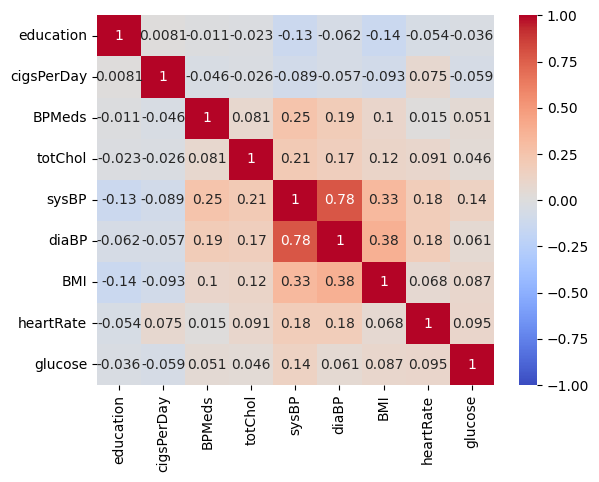

In [91]:
# Select only the numerical columns from the DataFrame
num_cols = data_set.select_dtypes(include='float64')

# Calculate the correlation matrix
corr_matrix = num_cols.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix as a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

**1.2** Box-plots

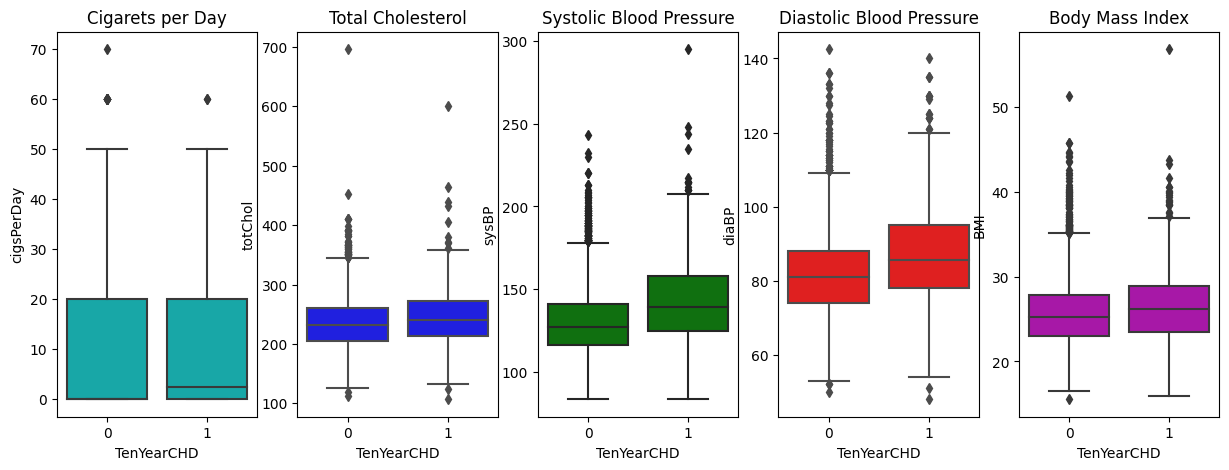

In [92]:
# Create box plots with categorical variable
fig, axs = plt.subplots(ncols=5, figsize=(15, 5))
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=data_set, ax=axs[0], color='c')
sns.boxplot(x='TenYearCHD', y='totChol', data=data_set, ax=axs[1], color='b')
sns.boxplot(x='TenYearCHD', y='sysBP', data=data_set, ax=axs[2], color='g')
sns.boxplot(x='TenYearCHD', y='diaBP', data=data_set, ax=axs[3], color='r')
sns.boxplot(x='TenYearCHD', y='BMI', data=data_set, ax=axs[4], color='m')

# Set titles for the subplots
axs[0].set_title('Cigarets per Day')
axs[1].set_title('Total Cholesterol')
axs[2].set_title('Systolic Blood Pressure')
axs[3].set_title('Diastolic Blood Pressure')
axs[4].set_title('Body Mass Index')

# Display the plot
plt.show()

**2.** Perform an ElasticNet regularization of the Binomial Logistic Regression model like we did in Session17 to predict `TenYearCHD`.

There are only two binary coded categorical predictors, `male` and `currentSmoker`, so there will be no need to separate categorical from numerical predictors and perform Dummy Coding with `sklearn.preprocessing.OneHotEncoder` here. However, make sure that there are no missing values in the data, because Linear Models like the Binomial Logistic Regression do not tolerate missing values! Keep only the rows with complete observations for this exercise. There should be `3656` observations left following the clean-up.

In [93]:
### --- YOUR CODE HERE --- ###
print(data_set.isna().sum())
print(data_set.shape)
data_set.dropna(inplace=True)
print(data_set.shape)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
(4238, 16)
(3656, 16)


Do we have a class imbalance problem in this data set? Examine:

In [94]:
data_set['TenYearCHD'].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

Now go for the ElasticNet like we did in Session17 and make sure to use the `class_weight` argument properly; use the weighted F-1 score to assess the model performance.

Do not forget to use `sklearn.preprocessing.StandardScaler` to standardize your feature matrix for regularization.

You can use the following values for the inverse penalty `C` and the `l1_ratio`:

`C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]`

`l1_range = [0, .1, .25, .5, .75, .9, 1]`

In [95]:
### --- YOUR CODE HERE --- ###
# - import f1_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# create the feature matrix X and the outcome vector y for sklearn
X = data_set.drop("TenYearCHD", axis=1)
y = data_set["TenYearCHD"]

# standardize X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# define the range of C (inverse penalty) values to try
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# define the range of l1_ratio (ElasticNet mix parameter) values to try
l1_range = [0, .1, .25, .5, .75, .9, 1]

# create empty list to store the score for each C value
cs = []
l1_ratios = []
f1s = []

# iterate over the C values and calculate the cross-validation score for each
for C in C_range:
    for l1 in l1_range:
        model = LogisticRegression(penalty='elasticnet', 
                                   C = C, 
                                   l1_ratio = l1,
                                   max_iter = 10000,
                                   solver='saga').fit(X,y)

        # store C, l1_ratio
        cs.append(C)
        l1_ratios.append(l1)
        # predict the outcome on new data
        y_pred = model.predict(X)
        # calculate the F1 score
        f1 = f1_score(y, y_pred, average="weighted")
        f1s.append(f1)
        # print the score for actual C, l1 value, accuracy, and F1
        print(f"C = {C:.3f}, l1_ratio = {l1:.3f}, F1 = {f1:.7f}")

# find the best C, l1_ratio values based on F1
best_ix = f1s.index(max(f1s))
best_C = cs[best_ix]
print(f"Best C = {best_C:.3f}")
best_l1_ratio = l1_ratios[best_ix]
print(f"Best l1_ratio = {best_l1_ratio:.3f}")
best_f1 = f1s[best_ix]
print(f"Best F1 = {best_f1:.7f}")

C = 0.001, l1_ratio = 0.000, F1 = 0.7797308
C = 0.001, l1_ratio = 0.100, F1 = 0.7777528
C = 0.001, l1_ratio = 0.250, F1 = 0.7777528
C = 0.001, l1_ratio = 0.500, F1 = 0.7777528
C = 0.001, l1_ratio = 0.750, F1 = 0.7777528
C = 0.001, l1_ratio = 0.900, F1 = 0.7777528
C = 0.001, l1_ratio = 1.000, F1 = 0.7777528
C = 0.010, l1_ratio = 0.000, F1 = 0.7950110
C = 0.010, l1_ratio = 0.100, F1 = 0.7944494
C = 0.010, l1_ratio = 0.250, F1 = 0.7871746
C = 0.010, l1_ratio = 0.500, F1 = 0.7827024
C = 0.010, l1_ratio = 0.750, F1 = 0.7802465
C = 0.010, l1_ratio = 0.900, F1 = 0.7795920
C = 0.010, l1_ratio = 1.000, F1 = 0.7797308
C = 0.100, l1_ratio = 0.000, F1 = 0.8033753
C = 0.100, l1_ratio = 0.100, F1 = 0.8024008
C = 0.100, l1_ratio = 0.250, F1 = 0.8018249
C = 0.100, l1_ratio = 0.500, F1 = 0.8008383
C = 0.100, l1_ratio = 0.750, F1 = 0.7990907
C = 0.100, l1_ratio = 0.900, F1 = 0.7990907
C = 0.100, l1_ratio = 1.000, F1 = 0.7985051
C = 1.000, l1_ratio = 0.000, F1 = 0.8058631
C = 1.000, l1_ratio = 0.100, F1 

Refit the model using the optimal `C` and `l1_ratio` values, print out the model coefficients, and discuss the effect of each predictor.

In [96]:
### --- YOUR CODE HERE --- ###
C = 1
l1 = 0
model = LogisticRegression(penalty='elasticnet', 
                                   C = C, 
                                   l1_ratio = l1,
                                   max_iter = 10000,
                                   solver='saga').fit(X,y)
print(np.exp(model.intercept_))
predictors = data_set.columns.drop("TenYearCHD").tolist()
print(predictors)
coefs = np.exp(model.coef_)[0]
print(coefs)
coefficients = pd.DataFrame({'predictor':predictors, 
                             'coeff':coefs})
coefficients.sort_values('coeff')

[0.13648737]
['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
[1.31646618 1.71922547 0.95242284 1.03659708 1.2369614  1.02835496
 1.05373485 1.1151517  1.00681116 1.10775407 1.40258047 0.95306021
 1.02711634 0.96192486 1.18513411]


,predictor,coeff
2,education,0.952423
11,diaBP,0.953060
13,heartRate,0.961925
8,diabetes,1.006811
12,BMI,1.027116
5,BPMeds,1.028355
3,currentSmoker,1.036597
6,prevalentStroke,1.053735
9,totChol,1.107754
7,prevalentHyp,1.115152


## Regularized Multinomial Regression

**3.** Perform an ElasticNet regularization of the Multinomial Regression model predict `quality` by first grouping the outcome variable into three larger classes (instead of using the original six classes).

Load the `winequality-red.csv` data set from the Session 18 `_data` directory:

In [97]:
### --- YOUR CODE HERE --- ###
wine_data = pd.read_csv(os.path.join(data_dir, 'winequality-red.csv'), sep=';')
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Overview of the `quality` variable:

In [98]:
### --- YOUR CODE HERE --- ###
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Recode the `quality` variable to group the existing classes in the following way:

- quality levels 3, 4, and 5 go into new class 1;
- quality level 6 goes into a new class 2;
- quality levels 7 and 8 go into a new class 3.

**Hint.** Use [pandas.DataFrame.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

Show us the distribution of instances across the classes again:

In [99]:
# Recode the 'quality' variable
wine_data['quality'] = wine_data['quality'].replace({3: 1, 4: 1, 5: 1, 6: 2, 7: 3, 8: 3})
wine_data['quality'].value_counts()

1    744
2    638
3    217
Name: quality, dtype: int64

Prepare `X`, and `y`, and use the following values of `C` and `l1_ratio` in ElasticNet for the Multinomial Regression model to predict `quality` (again, use the weighted F-1 score to select the best model):

`C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]`

`l1_range = [0, .1, .25, .5, .75, .9, 1]`

In [100]:
# Produce X, y, scale X
X = wine_data.drop('quality', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = wine_data['quality']

# Inverse regularization penalty C values 
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# ElasticNet mixing parameter values
l1_range = [0, .1, .25, .5, .75, .9, 1]

# create empty list to store each C value
cs = []
# create empty list to store each l1_ratio value
l1_ratios = []
# create empty list to store the weighted F1 score for each considered model
f1s = []

# iterate over the C values and calculate the cross-validation score for each
for C in C_range:
    for l1 in l1_range:
        model = LogisticRegression(penalty='elasticnet', 
                                   C = C, 
                                   l1_ratio = l1,
                                   max_iter = 10000,
                                   solver='saga').fit(X,y)

        # store C, l1_ratio
        cs.append(C)
        l1_ratios.append(l1)
        # predict the outcome on new data
        y_pred = model.predict(X)
        # calculate the F1 score
        f1 = f1_score(y, y_pred, average="weighted")
        f1s.append(f1)
        # print the score for actual C, l1 value, accuracy, and F1
        print(f"C = {C:.3f}, l1_ratio = {l1:.3f}, F1 = {f1:.7f}")

# find the best C, l1_ratio values based on F1
best_ix = f1s.index(max(f1s))
best_C = cs[best_ix]
print(f"Best C = {best_C:.3f}")
best_l1_ratio = l1_ratios[best_ix]
print(f"Best l1_ratio = {best_l1_ratio:.3f}")
best_f1 = f1s[best_ix]
print(f"Best F1 = {best_f1:.7f}")

C = 0.001, l1_ratio = 0.000, F1 = 0.5371887
C = 0.001, l1_ratio = 0.100, F1 = 0.5006836
C = 0.001, l1_ratio = 0.250, F1 = 0.3556149
C = 0.001, l1_ratio = 0.500, F1 = 0.2954984
C = 0.001, l1_ratio = 0.750, F1 = 0.2954984
C = 0.001, l1_ratio = 0.900, F1 = 0.2954984
C = 0.001, l1_ratio = 1.000, F1 = 0.2954984
C = 0.010, l1_ratio = 0.000, F1 = 0.6128435
C = 0.010, l1_ratio = 0.100, F1 = 0.6053741
C = 0.010, l1_ratio = 0.250, F1 = 0.5801344
C = 0.010, l1_ratio = 0.500, F1 = 0.5590625
C = 0.010, l1_ratio = 0.750, F1 = 0.5550117
C = 0.010, l1_ratio = 0.900, F1 = 0.5485191
C = 0.010, l1_ratio = 1.000, F1 = 0.5507085
C = 0.100, l1_ratio = 0.000, F1 = 0.6338128
C = 0.100, l1_ratio = 0.100, F1 = 0.6314451
C = 0.100, l1_ratio = 0.250, F1 = 0.6289027
C = 0.100, l1_ratio = 0.500, F1 = 0.6284344
C = 0.100, l1_ratio = 0.750, F1 = 0.6264457
C = 0.100, l1_ratio = 0.900, F1 = 0.6257821
C = 0.100, l1_ratio = 1.000, F1 = 0.6246869
C = 1.000, l1_ratio = 0.000, F1 = 0.6319740
C = 1.000, l1_ratio = 0.100, F1 

Print out the confusion matrix from the best model

In [102]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression(penalty='elasticnet', 
                                   C = best_C, 
                                   l1_ratio = best_l1_ratio,
                                   max_iter = 10000,
                                   solver='saga').fit(X,y)
y_hat = model.predict(X)
confusion_matrix(y, y_hat)

array([[582, 155,   7],
       [226, 368,  44],
       [ 14, 127,  76]])

Are the results any better than those that we were able to obtain from the initial qualities classes in Session18? Please comment.

`### --- YOUR ANSWER HERE --- ###`

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>